# Evaluate HammerDB Result

<img src="https://raw.githubusercontent.com/Beuth-Erdelt/Benchmark-Experiment-Host-Manager/master/docs/workflow-sketch-simple.png"/>


About the benchmark [1]:
> The TPC-C specification on which TPROC-C is based implements a computer system to fulfil orders from customers to supply products from a company. The company sells 100,000 items and keeps its stock in warehouses. Each warehouse has 10 sales districts and each district serves 3000 customers. The customers call the company whose operators take the order, each order containing a number of items. Orders are usually satisfied from the local warehouse however a small number of items are not in stock at a particular point in time and are supplied by an alternative warehouse. It is important to note that the size of the company is not fixed and can add Warehouses and sales districts as the company grows. For this reason your test schema can be as small or large as you wish with a larger schema requiring a more powerful computer system to process the increased level of transactions. The TPROC-C schema is shown below, in particular note how the number of rows in all of the tables apart from the ITEM table which is fixed is dependent upon the number of warehouses you choose to create your schema.

<img src="https://www.hammerdb.com/docs/resources/ch3-2.png" alt="drawing" width="600"/>

About the metrics [2]:
> HammerDB workloads produce 2 statistics to compare systems called **TPM** and NOPM respectively. NOPM value is based on a metric captured from within the test schema itself. As such **NOPM (New Orders per minute)** as a performance metric independent of any particular database implementation is the recommended primary metric to use.

References
1. https://www.hammerdb.com/docs/ch03s05.html
1. https://www.hammerdb.com/docs/ch03s04.html
1. https://www.hammerdb.com/docs/ch03.html

## Import Packages

In [1]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import pickle
# Some nice output
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)
from IPython.display import display, Markdown
%matplotlib inline

import evaluator

## Prepare Result

### Pick Result

In [2]:
code = "1684476181"
path = "./"

### Start Evaluation

In [3]:
evaluation = evaluator.tpcc(code=code, path=path)

### Transform all Benchmarking Log Files to DataFrames

We also pick the first log file to be an example for later

In [4]:
filename_example = ""

directory = os.fsencode(path+"/"+code)
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.startswith("bexhoma-benchmarker") and filename.endswith(".log"):
        #print("filename:", filename)
        pod_name = filename[filename.rindex("-")+1:-len(".log")]
        #print("pod_name:", pod_name)
        jobname = filename[len("bexhoma-benchmarker-"):-len("-"+pod_name+".log")]
        print("jobname:", jobname)
        evaluation.end_benchmarking(jobname)
        filename_example = filename

jobname: postgresql-aws-1-1684476181-1-1
jobname: postgresql-aws-10-1684476181-1-1
jobname: postgresql-aws-16-1684476181-1-1
jobname: postgresql-aws-160-1684476181-1-1
jobname: postgresql-aws-2-1684476181-1-1
jobname: postgresql-aws-20-1684476181-1-1
jobname: postgresql-aws-32-1684476181-1-1
jobname: postgresql-aws-320-1684476181-1-1
jobname: postgresql-aws-4-1684476181-1-1
jobname: postgresql-aws-40-1684476181-1-1
jobname: postgresql-aws-8-1684476181-1-1
jobname: postgresql-aws-80-1684476181-1-1


### Show a DataFrame for single Pod as Example

In [5]:
filename = path+"/"+code+"/"+filename_example+".df.pickle"
print(filename)
df = pd.read_pickle(filename)
df

.//1684476181/bexhoma-benchmarker-postgresql-aws-80-1684476181-1-1-zclb9.log.df.pickle


connection      configuration experiment_run  \
PostgreSQL-AWS-80-1                                                          
0                    PostgreSQL-AWS-80-1  PostgreSQL-AWS-80              1   

                    client    pod pod_count iterations duration rampup   sf  \
PostgreSQL-AWS-80-1                                                           
0                        1  zclb9         1   10000000        2      2  320   

                     run  errors vusers_loading vusers  NOPM    TPM  \
PostgreSQL-AWS-80-1                                                   
0                      0       0             80      1  4970  11333   

                           dbms  
PostgreSQL-AWS-80-1              
0                    PostgreSQL

In [6]:
warehouses = int(df['sf'].max())

### Transform all DataFrames into single Result DataFrame

In [7]:
evaluation.evaluate_results()

## Get Benchmarking Result

In [8]:
df = evaluation.get_df_benchmarking()
warehouses = int(df['sf'].max())
df

connection       configuration  \
connection_pod                                                     
PostgreSQL-AWS-1-1-1      PostgreSQL-AWS-1-1    PostgreSQL-AWS-1   
PostgreSQL-AWS-10-1-1    PostgreSQL-AWS-10-1   PostgreSQL-AWS-10   
PostgreSQL-AWS-16-1-1    PostgreSQL-AWS-16-1   PostgreSQL-AWS-16   
PostgreSQL-AWS-160-1-1  PostgreSQL-AWS-160-1  PostgreSQL-AWS-160   
PostgreSQL-AWS-2-1-1      PostgreSQL-AWS-2-1    PostgreSQL-AWS-2   
PostgreSQL-AWS-20-1-1    PostgreSQL-AWS-20-1   PostgreSQL-AWS-20   
PostgreSQL-AWS-32-1-1    PostgreSQL-AWS-32-1   PostgreSQL-AWS-32   
PostgreSQL-AWS-320-1-1  PostgreSQL-AWS-320-1  PostgreSQL-AWS-320   
PostgreSQL-AWS-4-1-1      PostgreSQL-AWS-4-1    PostgreSQL-AWS-4   
PostgreSQL-AWS-40-1-1    PostgreSQL-AWS-40-1   PostgreSQL-AWS-40   
PostgreSQL-AWS-8-1-1      PostgreSQL-AWS-8-1    PostgreSQL-AWS-8   
PostgreSQL-AWS-80-1-1    PostgreSQL-AWS-80-1   PostgreSQL-AWS-80   

                       experiment_run client    pod pod_count iterations  \
connection_pod                                                             
PostgreSQL-AWS-1-1-1                1      1  d594z         1   10000000   
PostgreSQL-AWS-10-1-1               1      1  rsjjh         1   10000000   
PostgreSQL-AWS-16-1-1               1      1  2655t         1   10000000   
PostgreSQL-AWS-160-1-1              1      1  dl68l         1   10000000   
PostgreSQL-AWS-2-1-1                1      1  pg4f4         1   10000000   
PostgreSQL-AWS-20-1-1               1      1  7hqst         1   10000000   
PostgreSQL-AWS-32-1-1               1      1  trpd2         1   10000000   
PostgreSQL-AWS-320-1-1              1      1  5dwfw         1   10000000   
PostgreSQL-AWS-4-1-1                1      1  4kq64         1   10000000   
PostgreSQL-AWS-40-1-1               1      1  cz6tg         1   10000000   
PostgreSQL-AWS-8-1-1                1      1  js2tx         1   10000000   
PostgreSQL-AWS-80-1-1               1      1  zclb9         1   10000000   

                       duration rampup   sf  run  errors vusers_loading  \
connection_pod                                                            
PostgreSQL-AWS-1-1-1          2      2  320    0       0              1   
PostgreSQL-AWS-10-1-1         2      2  320    0       0             10   
PostgreSQL-AWS-16-1-1         2      2  320    0       0             16   
PostgreSQL-AWS-160-1-1        2      2  320    0       0            160   
PostgreSQL-AWS-2-1-1          2      2  320    0       0              2   
PostgreSQL-AWS-20-1-1         2      2  320    0       0             20   
PostgreSQL-AWS-32-1-1         2      2  320    0       0             32   
PostgreSQL-AWS-320-1-1        2      2  320    0       0            320   
PostgreSQL-AWS-4-1-1          2      2  320    0       0              4   
PostgreSQL-AWS-40-1-1         2      2  320    0       0             40   
PostgreSQL-AWS-8-1-1          2      2  320    0       0              8   
PostgreSQL-AWS-80-1-1         2      2  320    0       0             80   

                       vusers   NOPM    TPM        dbms  
connection_pod                                           
PostgreSQL-AWS-1-1-1        1  11945  27369  PostgreSQL  
PostgreSQL-AWS-10-1-1       1   5161  11911  PostgreSQL  
PostgreSQL-AWS-16-1-1       1   4883  11301  PostgreSQL  
PostgreSQL-AWS-160-1-1      1   4922  11270  PostgreSQL  
PostgreSQL-AWS-2-1-1        1   5024  11716  PostgreSQL  
PostgreSQL-AWS-20-1-1       1   5239  11978  PostgreSQL  
PostgreSQL-AWS-32-1-1       1   5099  11828  PostgreSQL  
PostgreSQL-AWS-320-1-1      1  12712  29185  PostgreSQL  
PostgreSQL-AWS-4-1-1        1   5245  12052  PostgreSQL  
PostgreSQL-AWS-40-1-1       1   4881  11325  PostgreSQL  
PostgreSQL-AWS-8-1-1        1   5088  11918  PostgreSQL  
PostgreSQL-AWS-80-1-1       1   4970  11333  PostgreSQL

### Reconstruct workflow out of result

In [9]:
evaluation.reconstruct_workflow(df)

{'PostgreSQL-AWS-1': [[1]],
 'PostgreSQL-AWS-10': [[1]],
 'PostgreSQL-AWS-16': [[1]],
 'PostgreSQL-AWS-160': [[1]],
 'PostgreSQL-AWS-2': [[1]],
 'PostgreSQL-AWS-20': [[1]],
 'PostgreSQL-AWS-32': [[1]],
 'PostgreSQL-AWS-320': [[1]],
 'PostgreSQL-AWS-4': [[1]],
 'PostgreSQL-AWS-40': [[1]],
 'PostgreSQL-AWS-8': [[1]],
 'PostgreSQL-AWS-80': [[1]]}

### Plot Results

#### Set data types for plotting

In [10]:
df_plot = evaluation.benchmarking_set_datatypes(df)

df_plot.T

connection_pod PostgreSQL-AWS-1-1-1 PostgreSQL-AWS-10-1-1  \
connection       PostgreSQL-AWS-1-1   PostgreSQL-AWS-10-1   
configuration      PostgreSQL-AWS-1     PostgreSQL-AWS-10   
experiment_run                    1                     1   
client                            1                     1   
pod                           d594z                 rsjjh   
pod_count                         1                     1   
iterations                 10000000              10000000   
duration                          2                     2   
rampup                            2                     2   
sf                              320                   320   
run                               0                     0   
errors                            0                     0   
vusers_loading                    1                    10   
vusers                            1                     1   
NOPM                          11945                  5161   
TPM                           27369                 11911   
dbms                     PostgreSQL            PostgreSQL   

connection_pod PostgreSQL-AWS-16-1-1 PostgreSQL-AWS-160-1-1  \
connection       PostgreSQL-AWS-16-1   PostgreSQL-AWS-160-1   
configuration      PostgreSQL-AWS-16     PostgreSQL-AWS-160   
experiment_run                     1                      1   
client                             1                      1   
pod                            2655t                  dl68l   
pod_count                          1                      1   
iterations                  10000000               10000000   
duration                           2                      2   
rampup                             2                      2   
sf                               320                    320   
run                                0                      0   
errors                             0                      0   
vusers_loading                    16                    160   
vusers                             1                      1   
NOPM                            4883                   4922   
TPM                            11301                  11270   
dbms                      PostgreSQL             PostgreSQL   

connection_pod PostgreSQL-AWS-2-1-1 PostgreSQL-AWS-20-1-1  \
connection       PostgreSQL-AWS-2-1   PostgreSQL-AWS-20-1   
configuration      PostgreSQL-AWS-2     PostgreSQL-AWS-20   
experiment_run                    1                     1   
client                            1                     1   
pod                           pg4f4                 7hqst   
pod_count                         1                     1   
iterations                 10000000              10000000   
duration                          2                     2   
rampup                            2                     2   
sf                              320                   320   
run                               0                     0   
errors                            0                     0   
vusers_loading                    2                    20   
vusers                            1                     1   
NOPM                           5024                  5239   
TPM                           11716                 11978   
dbms                     PostgreSQL            PostgreSQL   

connection_pod PostgreSQL-AWS-32-1-1 PostgreSQL-AWS-320-1-1  \
connection       PostgreSQL-AWS-32-1   PostgreSQL-AWS-320-1   
configuration      PostgreSQL-AWS-32     PostgreSQL-AWS-320   
experiment_run                     1                      1   
client                             1                      1   
pod                            trpd2                  5dwfw   
pod_count                          1                      1   
iterations                  10000000               10000000   
duration                           2                      2   
rampup                             2                      2   
sf                               320 

#### Restrict result to specific part

In [11]:
#df_plot = df_plot[df_plot["experiment_run"]=="1"]
#df_plot = df_plot[df_plot["client"] == "1"]
df_plot

connection       configuration  \
connection_pod                                                     
PostgreSQL-AWS-1-1-1      PostgreSQL-AWS-1-1    PostgreSQL-AWS-1   
PostgreSQL-AWS-10-1-1    PostgreSQL-AWS-10-1   PostgreSQL-AWS-10   
PostgreSQL-AWS-16-1-1    PostgreSQL-AWS-16-1   PostgreSQL-AWS-16   
PostgreSQL-AWS-160-1-1  PostgreSQL-AWS-160-1  PostgreSQL-AWS-160   
PostgreSQL-AWS-2-1-1      PostgreSQL-AWS-2-1    PostgreSQL-AWS-2   
PostgreSQL-AWS-20-1-1    PostgreSQL-AWS-20-1   PostgreSQL-AWS-20   
PostgreSQL-AWS-32-1-1    PostgreSQL-AWS-32-1   PostgreSQL-AWS-32   
PostgreSQL-AWS-320-1-1  PostgreSQL-AWS-320-1  PostgreSQL-AWS-320   
PostgreSQL-AWS-4-1-1      PostgreSQL-AWS-4-1    PostgreSQL-AWS-4   
PostgreSQL-AWS-40-1-1    PostgreSQL-AWS-40-1   PostgreSQL-AWS-40   
PostgreSQL-AWS-8-1-1      PostgreSQL-AWS-8-1    PostgreSQL-AWS-8   
PostgreSQL-AWS-80-1-1    PostgreSQL-AWS-80-1   PostgreSQL-AWS-80   

                        experiment_run  client    pod  pod_count  iterations  \
connection_pod                                                                 
PostgreSQL-AWS-1-1-1                 1       1  d594z          1    10000000   
PostgreSQL-AWS-10-1-1                1       1  rsjjh          1    10000000   
PostgreSQL-AWS-16-1-1                1       1  2655t          1    10000000   
PostgreSQL-AWS-160-1-1               1       1  dl68l          1    10000000   
PostgreSQL-AWS-2-1-1                 1       1  pg4f4          1    10000000   
PostgreSQL-AWS-20-1-1                1       1  7hqst          1    10000000   
PostgreSQL-AWS-32-1-1                1       1  trpd2          1    10000000   
PostgreSQL-AWS-320-1-1               1       1  5dwfw          1    10000000   
PostgreSQL-AWS-4-1-1                 1       1  4kq64          1    10000000   
PostgreSQL-AWS-40-1-1                1       1  cz6tg          1    10000000   
PostgreSQL-AWS-8-1-1                 1       1  js2tx          1    10000000   
PostgreSQL-AWS-80-1-1                1       1  zclb9          1    10000000   

                        duration  rampup   sf  run  errors  vusers_loading  \
connection_pod                                                               
PostgreSQL-AWS-1-1-1           2       2  320    0       0               1   
PostgreSQL-AWS-10-1-1          2       2  320    0       0              10   
PostgreSQL-AWS-16-1-1          2       2  320    0       0              16   
PostgreSQL-AWS-160-1-1         2       2  320    0       0             160   
PostgreSQL-AWS-2-1-1           2       2  320    0       0               2   
PostgreSQL-AWS-20-1-1          2       2  320    0       0              20   
PostgreSQL-AWS-32-1-1          2       2  320    0       0              32   
PostgreSQL-AWS-320-1-1         2       2  320    0       0             320   
PostgreSQL-AWS-4-1-1           2       2  320    0       0               4   
PostgreSQL-AWS-40-1-1          2       2  320    0       0              40   
PostgreSQL-AWS-8-1-1           2       2  320    0       0               8   
PostgreSQL-AWS-80-1-1          2       2  320    0       0              80   

                        vusers   NOPM    TPM        dbms  
connection_pod                                            
PostgreSQL-AWS-1-1-1         1  11945  27369  PostgreSQL  
PostgreSQL-AWS-10-1-1        1   5161  11911  PostgreSQL  
PostgreSQL-AWS-16-1-1        1   4883  11301  PostgreSQL  
PostgreSQL-AWS-160-1-1       1   4922  11270  PostgreSQL  
PostgreSQL-AWS-2-1-1         1   5024  11716  PostgreSQL  
PostgreSQL-AWS-20-1-1        1   5239  11978  PostgreSQL  
PostgreSQL-AWS-32-1-1        1   5099  11828  PostgreSQL  
PostgreSQL-AWS-320-1-1       1  12712  29185  PostgreSQL  
PostgreSQL-AWS-4-1-1         1   5245  12052  PostgreSQL  
PostgreSQL-AWS-40-1-1        1   4881  11325  PostgreSQL  
PostgreSQL-AWS-8-1-1         1   5088  11918  PostgreSQL  
PostgreSQL-AWS-80-1-1        1   4970  11333  PostgreSQL

#### Plot metrics

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


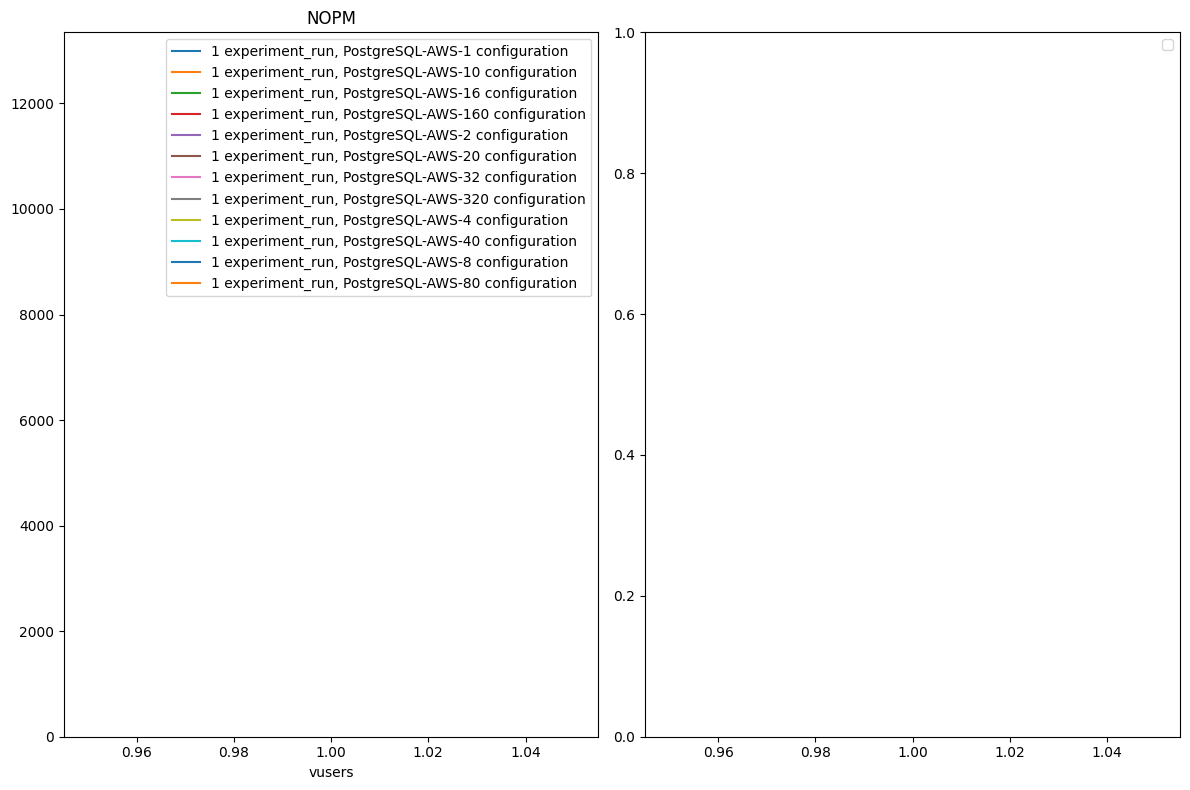

In [12]:
%matplotlib inline

x = "vusers"
y = "NOPM"
column = "configuration"
evaluation.plot(df_plot, column=column, x=x, y=y, plot_by="experiment_run")

### Aggregate by parallel pods

In [13]:
df = evaluation.get_df_benchmarking()
df_plot = evaluation.benchmarking_set_datatypes(df)
df_aggregated = evaluation.benchmarking_aggregate_by_parallel_pods(df_plot)
df_aggregated

connection       configuration  \
PostgreSQL-AWS-1-1      PostgreSQL-AWS-1-1    PostgreSQL-AWS-1   
PostgreSQL-AWS-10-1    PostgreSQL-AWS-10-1   PostgreSQL-AWS-10   
PostgreSQL-AWS-16-1    PostgreSQL-AWS-16-1   PostgreSQL-AWS-16   
PostgreSQL-AWS-160-1  PostgreSQL-AWS-160-1  PostgreSQL-AWS-160   
PostgreSQL-AWS-2-1      PostgreSQL-AWS-2-1    PostgreSQL-AWS-2   
PostgreSQL-AWS-20-1    PostgreSQL-AWS-20-1   PostgreSQL-AWS-20   
PostgreSQL-AWS-32-1    PostgreSQL-AWS-32-1   PostgreSQL-AWS-32   
PostgreSQL-AWS-320-1  PostgreSQL-AWS-320-1  PostgreSQL-AWS-320   
PostgreSQL-AWS-4-1      PostgreSQL-AWS-4-1    PostgreSQL-AWS-4   
PostgreSQL-AWS-40-1    PostgreSQL-AWS-40-1   PostgreSQL-AWS-40   
PostgreSQL-AWS-8-1      PostgreSQL-AWS-8-1    PostgreSQL-AWS-8   
PostgreSQL-AWS-80-1    PostgreSQL-AWS-80-1   PostgreSQL-AWS-80   

                      experiment_run  client    pod  pod_count  iterations  \
PostgreSQL-AWS-1-1                 1       1  d594z          1    10000000   
PostgreSQL-AWS-10-1                1       1  rsjjh          1    10000000   
PostgreSQL-AWS-16-1                1       1  2655t          1    10000000   
PostgreSQL-AWS-160-1               1       1  dl68l          1    10000000   
PostgreSQL-AWS-2-1                 1       1  pg4f4          1    10000000   
PostgreSQL-AWS-20-1                1       1  7hqst          1    10000000   
PostgreSQL-AWS-32-1                1       1  trpd2          1    10000000   
PostgreSQL-AWS-320-1               1       1  5dwfw          1    10000000   
PostgreSQL-AWS-4-1                 1       1  4kq64          1    10000000   
PostgreSQL-AWS-40-1                1       1  cz6tg          1    10000000   
PostgreSQL-AWS-8-1                 1       1  js2tx          1    10000000   
PostgreSQL-AWS-80-1                1       1  zclb9          1    10000000   

                      duration   sf  run  errors  vusers_loading  vusers  \
PostgreSQL-AWS-1-1           2  320    0       0               1       1   
PostgreSQL-AWS-10-1          2  320    0       0              10       1   
PostgreSQL-AWS-16-1          2  320    0       0              16       1   
PostgreSQL-AWS-160-1         2  320    0       0             160       1   
PostgreSQL-AWS-2-1           2  320    0       0               2       1   
PostgreSQL-AWS-20-1          2  320    0       0              20       1   
PostgreSQL-AWS-32-1          2  320    0       0              32       1   
PostgreSQL-AWS-320-1         2  320    0       0             320       1   
PostgreSQL-AWS-4-1           2  320    0       0               4       1   
PostgreSQL-AWS-40-1          2  320    0       0              40       1   
PostgreSQL-AWS-8-1           2  320    0       0               8       1   
PostgreSQL-AWS-80-1          2  320    0       0              80       1   

                         NOPM      TPM        dbms  
PostgreSQL-AWS-1-1    11945.0  27369.0  PostgreSQL  
PostgreSQL-AWS-10-1    5161.0  11911.0  PostgreSQL  
PostgreSQL-AWS-16-1    4883.0  11301.0  PostgreSQL  
PostgreSQL-AWS-160-1   4922.0  11270.0  PostgreSQL  
PostgreSQL-AWS-2-1     5024.0  11716.0  PostgreSQL  
PostgreSQL-AWS-20-1    5239.0  11978.0  PostgreSQL  
PostgreSQL-AWS-32-1    5099.0  11828.0  PostgreSQL  
PostgreSQL-AWS-320-1  12712.0  29185.0  PostgreSQL  
PostgreSQL-AWS-4-1     5245.0  12052.0  PostgreSQL  
PostgreSQL-AWS-40-1    4881.0  11325.0  PostgreSQL  
PostgreSQL-AWS-8-1     5088.0  11918.0  PostgreSQL  
PostgreSQL-AWS-80-1    4970.0  11333.0  PostgreSQL

#### Plot

<AxesSubplot: title={'center': 'NOPM'}, xlabel='vusers'>

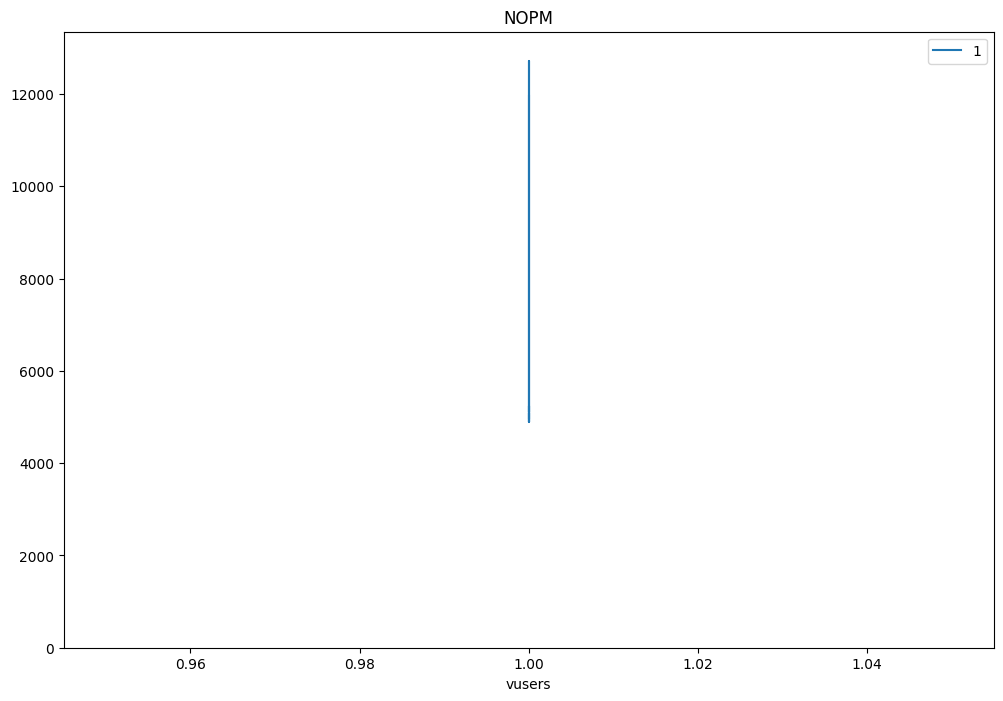

In [14]:
column = "experiment_run"
x = "vusers"
y = "NOPM"
evaluation.plot(df_aggregated.sort_values("vusers"), column=column, x=x, y=y)#, plot_by="configuration")

## Show Infos about Connections

In [15]:
import ast

with open(path+code+"/connections.config",'r') as inf:
    connections = ast.literal_eval(inf.read())

print("found", len(connections), "connections")

found 12 connections


In [16]:
import json
pretty_connections = json.dumps(connections, indent=2)

#print(pretty_connections)

### Loading time per number of loading threads

PostgreSQL-AWS-1-1 5609.310981988907 [s] for 1 threads on ip-192-168-92-229.eu-central-1.compute.internal
PostgreSQL-AWS-10-1 844.0817789062858 [s] for 10 threads on ip-192-168-92-229.eu-central-1.compute.internal
PostgreSQL-AWS-16-1 852.1947537064552 [s] for 16 threads on ip-192-168-92-229.eu-central-1.compute.internal
PostgreSQL-AWS-160-1 855.1426996737719 [s] for 160 threads on ip-192-168-92-229.eu-central-1.compute.internal
PostgreSQL-AWS-2-1 2865.2997354120016 [s] for 2 threads on ip-192-168-92-229.eu-central-1.compute.internal
PostgreSQL-AWS-20-1 855.1270066872239 [s] for 20 threads on ip-192-168-92-229.eu-central-1.compute.internal
PostgreSQL-AWS-32-1 845.1365977451205 [s] for 32 threads on ip-192-168-92-229.eu-central-1.compute.internal
PostgreSQL-AWS-320-1 897.2876239418983 [s] for 320 threads on ip-192-168-92-229.eu-central-1.compute.internal
PostgreSQL-AWS-4-1 1456.1134457960725 [s] for 4 threads on ip-192-168-92-229.eu-central-1.compute.internal
PostgreSQL-AWS-40-1 874.1336

<AxesSubplot: title={'center': 'Loading time [s]'}>

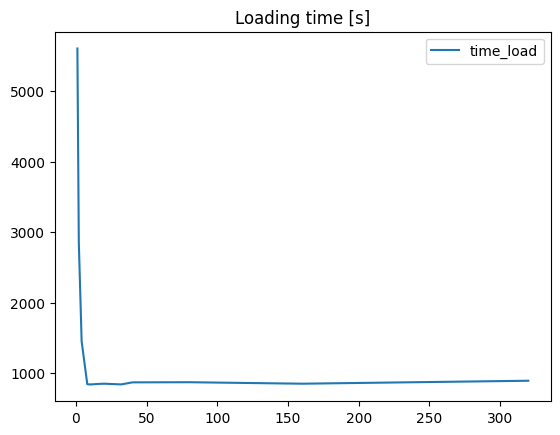

In [17]:
connections_sorted = sorted(connections, key=lambda c: c['name']) 

result = dict()

for c in connections_sorted:
    print(c['name'], 
          c['timeLoad'], 
          '[s] for', 
          c['parameter']['connection_parameter']['loading_parameters']['PARALLEL'], 
          'threads on',
          c['hostsystem']['node'])
    result[c['parameter']['connection_parameter']['loading_parameters']['PARALLEL']] = c['hostsystem']['loading_timespans']['sensor'][0][1]-c['hostsystem']['loading_timespans']['sensor'][0][0]
    #result[c['parameter']['connection_parameter']['loading_parameters']['PARALLEL']] = c['timeIngesting']

print(result)

df = pd.DataFrame(result, index=['time_load'])#, index=result.keys())

df.T.sort_index().plot(title="Loading time [s]")
#df[1]

time_load
1     2.054575
2     4.023751
4     7.922971
8    13.617021
10   13.681710
16   13.552941
20   13.505275
32   13.665480
40   13.211009
80   13.180778
160  13.505275
320  12.871508

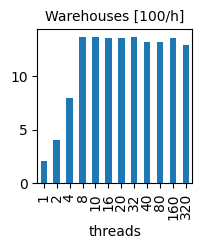

In [18]:
df_tpx = (warehouses*3600.0)/df.T.sort_index()

df_plot_this = df_tpx.copy()
df_plot_this['time_load'] = df_plot_this['time_load']/100.
ax = df_plot_this.plot.bar(title="Warehouses [100/h]", figsize=(2,2), legend=False)
ax.set_xlabel("threads")
ax.title.set_size(10)
df_plot_this

## Get monitoring metrics

### Loading

In [19]:
evaluation.transform_monitoring_results()

#### Example metric

In [20]:
evaluation.get_monitoring_metrics()

df = evaluation.get_monitoring_metric('total_cpu_memory')

df.T

0            1            2            3     \
PostgreSQL-AWS-1-1    2380.546875  2380.546875  2382.464844  2382.464844   
PostgreSQL-AWS-2-1    2384.152344  2384.152344  2384.152344  2384.152344   
PostgreSQL-AWS-4-1    2381.476562  2381.476562  2381.476562  2381.476562   
PostgreSQL-AWS-8-1    2382.394531  2382.394531  2382.394531  2383.574219   
PostgreSQL-AWS-10-1   2380.859375  2380.859375  2380.859375  2380.859375   
PostgreSQL-AWS-16-1   2377.800781  2377.800781  2377.800781  2377.800781   
PostgreSQL-AWS-20-1   2378.000000  2378.000000  2378.000000  2378.000000   
PostgreSQL-AWS-32-1   2376.679688  2376.679688  2376.679688  2376.679688   
PostgreSQL-AWS-40-1   2380.277344  2380.277344  2380.277344  2380.277344   
PostgreSQL-AWS-80-1   2383.230469  2383.230469  2383.230469  2383.230469   
PostgreSQL-AWS-160-1  2377.257812  2377.257812  2377.257812  2377.257812   
PostgreSQL-AWS-320-1  2377.261719  2377.261719  2377.261719  2383.792969   

                             4            5            6            7     \
PostgreSQL-AWS-1-1    2382.464844  2382.464844  2382.464844  2382.464844   
PostgreSQL-AWS-2-1    2384.152344  2384.152344  2384.152344  2384.152344   
PostgreSQL-AWS-4-1    2381.476562  2389.066406  2389.066406  2389.066406   
PostgreSQL-AWS-8-1    2383.574219  2383.574219  2383.574219  2383.574219   
PostgreSQL-AWS-10-1   2380.859375  2387.339844  2387.339844  2387.339844   
PostgreSQL-AWS-16-1   2377.800781  2377.800781  2380.328125  2380.328125   
PostgreSQL-AWS-20-1   2378.000000  2378.000000  2378.000000  2380.179688   
PostgreSQL-AWS-32-1   2376.679688  2379.738281  2379.738281  2379.738281   
PostgreSQL-AWS-40-1   2380.277344  2386.542969  2386.542969  2386.542969   
PostgreSQL-AWS-80-1   2389.832031  2389.832031  2389.832031  2389.832031   
PostgreSQL-AWS-160-1  2377.257812  2377.257812  2377.257812  2377.257812   
PostgreSQL-AWS-320-1  2383.792969  2383.792969  2383.792969  2383.792969   

                             8            9     ...        5629        5630  \
PostgreSQL-AWS-1-1    2382.464844  2382.464844  ...  27696.6875  27696.6875   
PostgreSQL-AWS-2-1    2384.152344  2427.828125  ...         NaN         NaN   
PostgreSQL-AWS-4-1    2389.066406  2389.066406  ...         NaN         NaN   
PostgreSQL-AWS-8-1    2383.574219  2383.574219  ...         NaN         NaN   
PostgreSQL-AWS-10-1   2387.339844  2387.339844  ...         NaN         NaN   
PostgreSQL-AWS-16-1   2380.328125  2380.328125  ...         NaN         NaN   
PostgreSQL-AWS-20-1   2380.179688  2380.179688  ...         NaN         NaN   
PostgreSQL-AWS-32-1   2379.738281  2379.738281  ...         NaN         NaN   
PostgreSQL-AWS-40-1   2386.542969  2386.542969  ...         NaN         NaN   
PostgreSQL-AWS-80-1   2389.832031  2389.832031  ...         NaN         NaN   
PostgreSQL-AWS-160-1  2377.257812  2414.117188  ...         NaN         NaN   
PostgreSQL-AWS-320-1  2383.792969  2383.792969  ...         NaN         NaN   

                            5631        5632        5633        5634  \
PostgreSQL-AWS-1-1    27696.6875  27696.6875  27696.6875  27696.6875   
PostgreSQL-AWS-2-1           NaN         NaN         NaN         NaN   
PostgreSQL-AWS-4-1           NaN         NaN         NaN         NaN   
PostgreSQL-AWS-8-1           NaN         NaN         NaN         NaN   
PostgreSQL-AWS-10-1          NaN         NaN         NaN         NaN   
PostgreSQL-AWS-16-1          NaN         NaN         NaN         NaN   
PostgreSQL-AWS-20-1          NaN         NaN         NaN         NaN   
PostgreSQL-AWS-32-1          NaN         NaN         NaN         NaN   
PostgreSQL-AWS-40-1          NaN         NaN         NaN         NaN   
PostgreSQL-AWS-80-1          NaN         NaN         NaN         NaN   
PostgreSQL-AWS-160-1         NaN         NaN         NaN         NaN   
PostgreSQL-AWS-320-1         NaN         NaN         NaN         NaN   

                            5635        5636        5637        5638  
PostgreSQL-AWS-

#### Plot all metrics

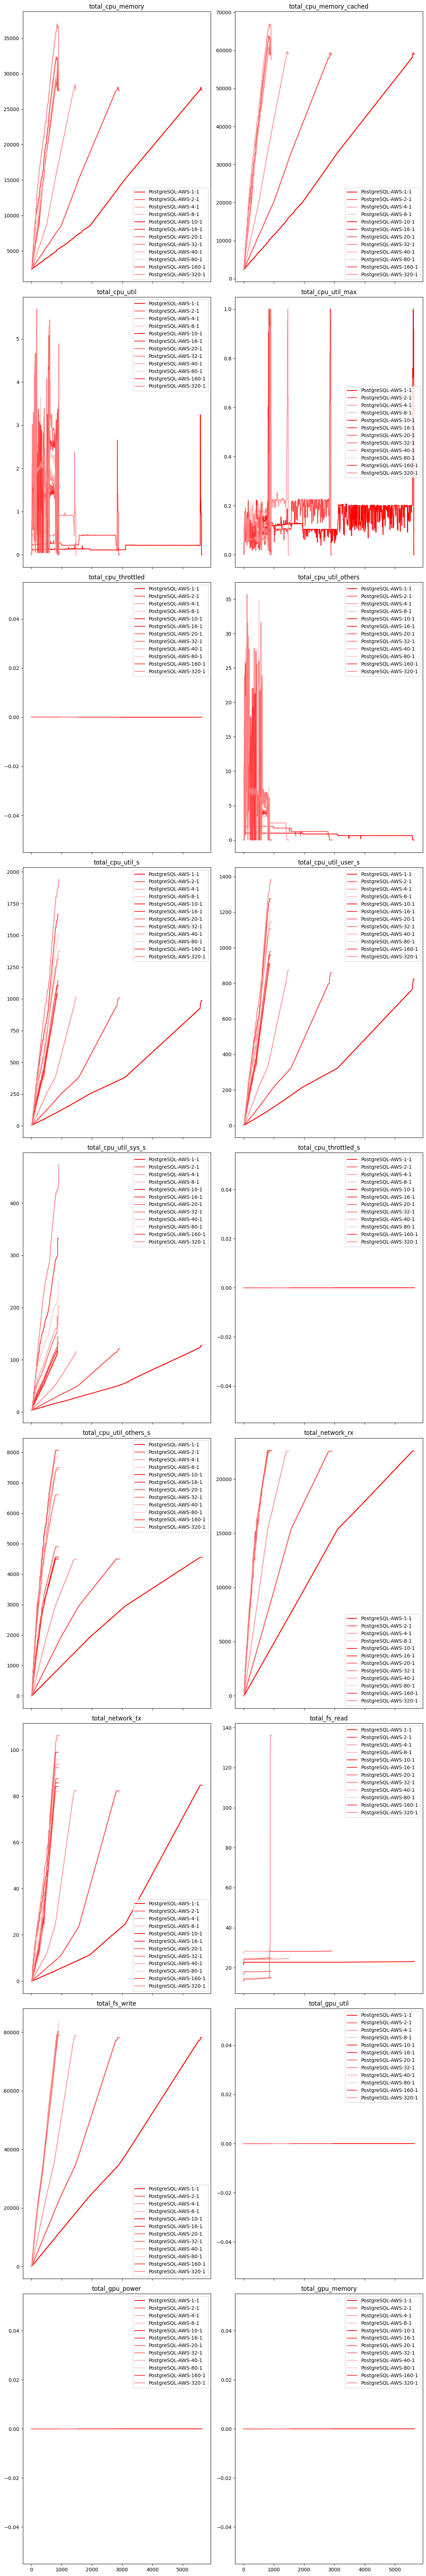

In [21]:
dict_colors = evaluation.get_dict_color_by_connection_property('docker')

evaluation.plot_all_metrics(component='loading', dict_colors=dict_colors)

### Benchmarking

In [22]:
evaluation.transform_monitoring_results(component='stream')

#### Plot all metrics

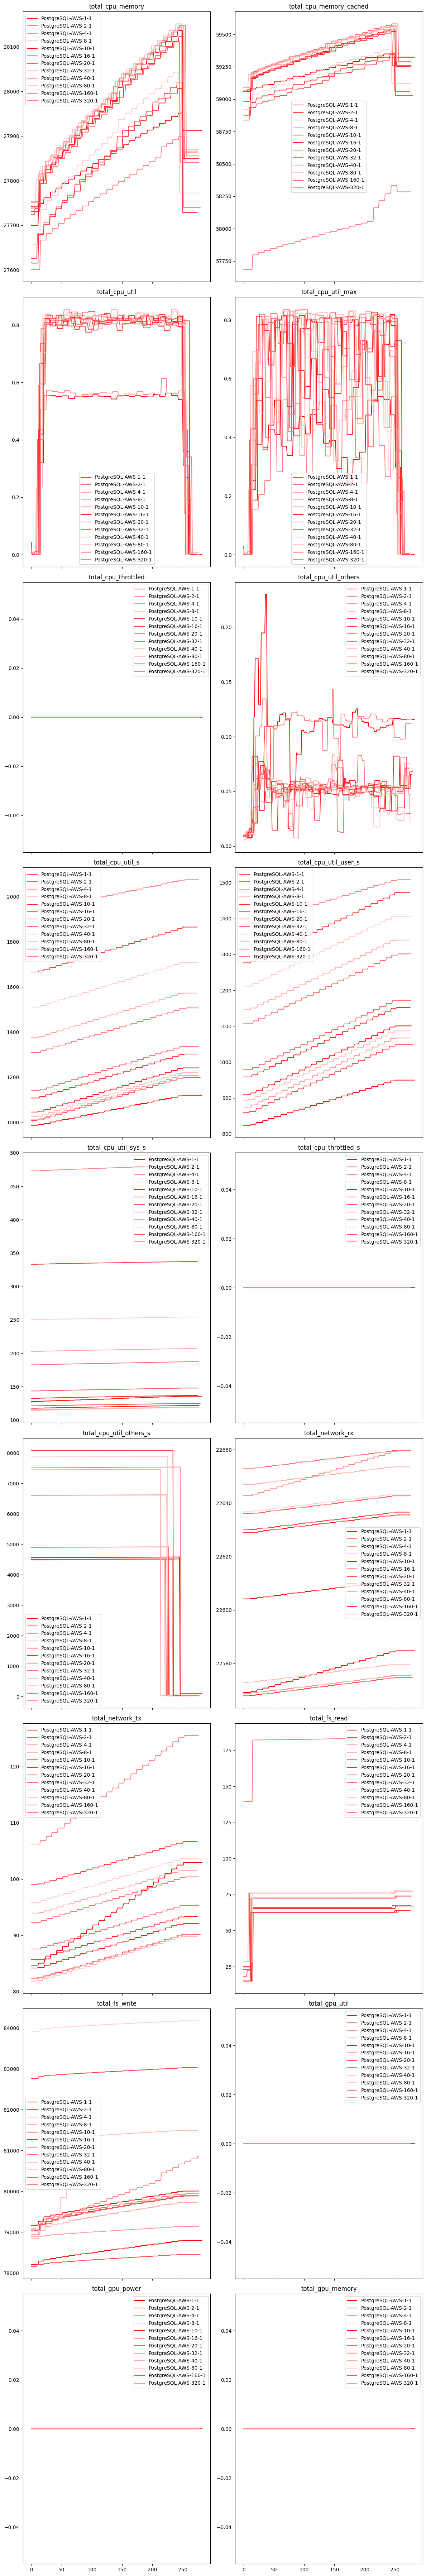

In [23]:
dict_colors = evaluation.get_dict_color_by_connection_property('docker')

evaluation.plot_all_metrics(component='stream', dict_colors=dict_colors)

## Loader Component

In [24]:
evaluation.transform_monitoring_results(component='loader')

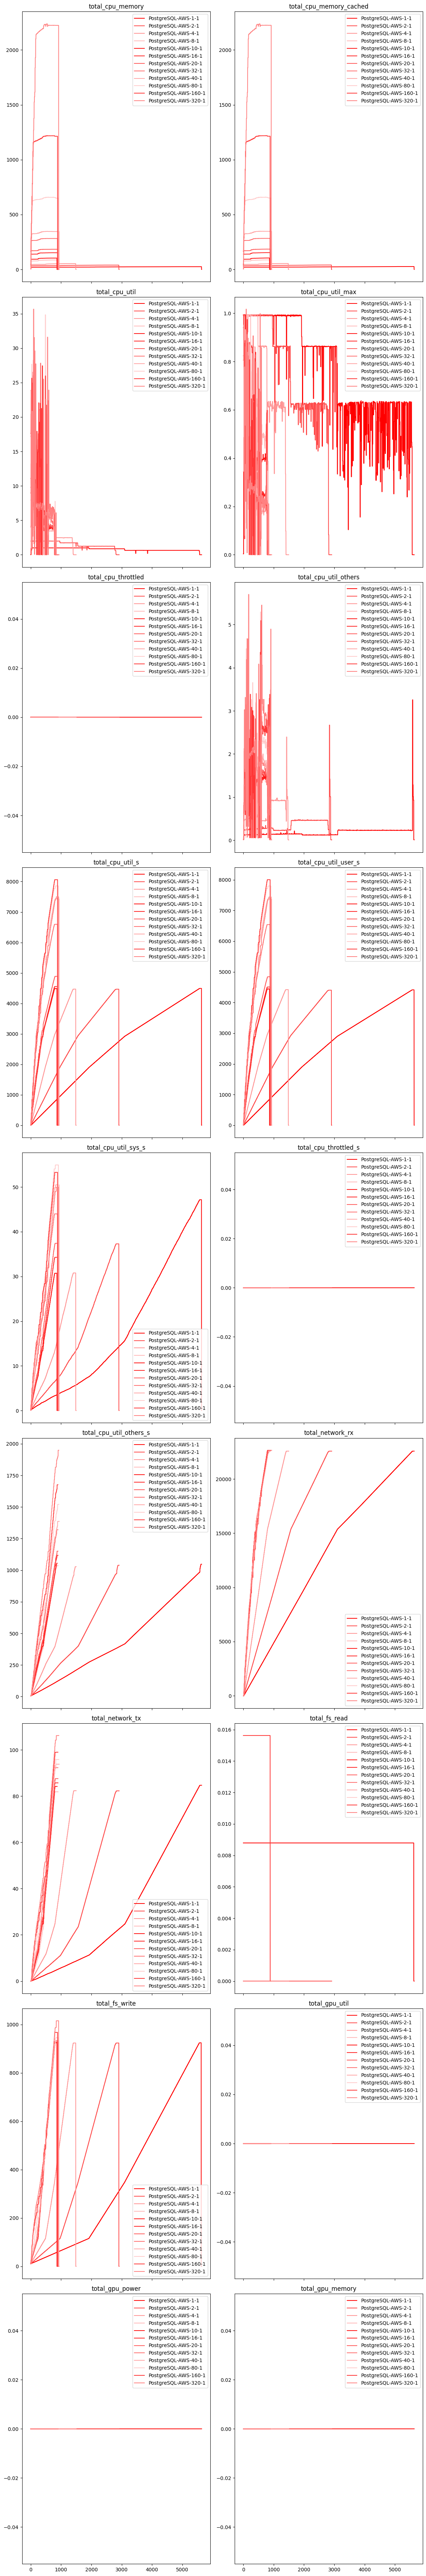

In [25]:
dict_colors = evaluation.get_dict_color_by_connection_property('docker')

evaluation.plot_all_metrics(component='loader', dict_colors=dict_colors)

## Benchmarker Component

In [26]:
evaluation.transform_monitoring_results(component='benchmarker')

In [27]:
dict_colors = evaluation.get_dict_color_by_connection_property('docker')

evaluation.plot_all_metrics(component='benchmarker', dict_colors=dict_colors)

## Plot Maximums

pod_count            1
vusers                
1           982.011422
2          1002.304085
4          1005.890690
8          1019.617949
10         1040.421041
16         1102.583751
20         1134.886786
32         1304.330171
40         1370.369336
80         1505.673699
160        1660.736461
320        1933.754196

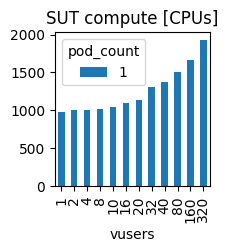

In [28]:
#df = evaluation.get_monitoring_metric('total_cpu_util_s', component='loading').max() - evaluation.get_monitoring_metric('total_cpu_util_s', component='loading').min()
#df.plot.bar()

df = evaluation.get_monitoring_metric('total_cpu_util_s', component='loading').max() - evaluation.get_monitoring_metric('total_cpu_util_s', component='loading').min()
df.T
#df.plot.bar()
#df = evaluation.get_monitoring_metric('total_cpu_util_s', component='benchmarker').max() - evaluation.get_monitoring_metric('total_cpu_util_s', component='benchmarker').min()
#df = df.filter(regex='12288', axis=0)
#df['connection'] = df.index
df = pd.DataFrame(df)
df['index'] = list(df.index)
df

df['vusers'] = df.index.map(lambda x: str(df_aggregated.loc[x]['vusers_loading']))
df['pod_count'] = df.index.map(lambda x: str(df_aggregated.loc[x]['pod_count']))

df = df.pivot(columns='pod_count', values=0, index='vusers')
df.index = df.index.map(lambda x: int(x))
df.sort_values("vusers", inplace=True)
#df = df*100
df

#df['index'].map(lambda x: str(df_aggregated.loc[x]['terminals']))
#df.index = df.index.map(lambda x: str(df_aggregated.loc[x]['terminals']))
#             str(df_aggregated.loc[x]['terminals'])+"-"+str(df_aggregated.loc[x]['target'])+"-"+str(df_aggregated.loc[x]['pod_count'])'')
#df.sort_index(inplace=True)
ax = df.plot.bar(figsize=(2,2),legend=True)
#plt.legend(loc='best')
ax.title.set_size(9)
ax.set_title("SUT compute [CPUs]")
ax.set_xlabel("vusers")
df

In [29]:
df = evaluation.get_monitoring_metric('total_cpu_util', component='loading').max()
df.plot.bar()
df

PostgreSQL-AWS-1-1      3.244934
PostgreSQL-AWS-2-1      2.655137
PostgreSQL-AWS-4-1      2.381480
PostgreSQL-AWS-8-1      1.778771
PostgreSQL-AWS-10-1     2.767313
PostgreSQL-AWS-16-1     2.951630
PostgreSQL-AWS-20-1     3.140101
PostgreSQL-AWS-32-1     3.280789
PostgreSQL-AWS-40-1     3.413444
PostgreSQL-AWS-80-1     5.283223
PostgreSQL-AWS-160-1    5.078499
PostgreSQL-AWS-320-1    5.688942
dtype: float64

PostgreSQL-AWS-1-1      28061.222656
PostgreSQL-AWS-2-1      28093.226562
PostgreSQL-AWS-4-1      28443.574219
PostgreSQL-AWS-8-1      29055.285156
PostgreSQL-AWS-10-1     28815.828125
PostgreSQL-AWS-16-1     29193.511719
PostgreSQL-AWS-20-1     29302.902344
PostgreSQL-AWS-32-1     29697.121094
PostgreSQL-AWS-40-1     29910.429688
PostgreSQL-AWS-80-1     30382.437500
PostgreSQL-AWS-160-1    32355.839844
PostgreSQL-AWS-320-1    37030.250000
dtype: float64

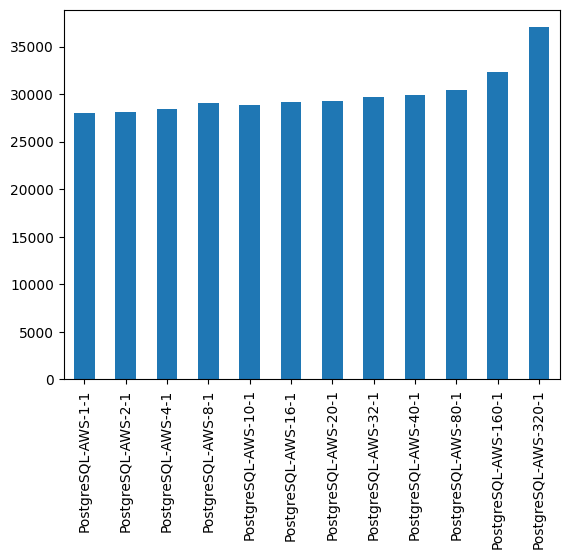

In [30]:
df = evaluation.get_monitoring_metric('total_cpu_memory', component='loading').max()
df.plot.bar()
df

In [31]:
df = evaluation.get_monitoring_metric('total_cpu_memory_cached', component='loading').max()
df.plot.bar()
df

PostgreSQL-AWS-1-1      59344.652344
PostgreSQL-AWS-2-1      59305.812500
PostgreSQL-AWS-4-1      59652.632812
PostgreSQL-AWS-8-1      59829.640625
PostgreSQL-AWS-10-1     59925.710938
PostgreSQL-AWS-16-1     60408.933594
PostgreSQL-AWS-20-1     60347.265625
PostgreSQL-AWS-32-1     60773.066406
PostgreSQL-AWS-40-1     60959.562500
PostgreSQL-AWS-80-1     61524.851562
PostgreSQL-AWS-160-1    63752.117188
PostgreSQL-AWS-320-1    66967.082031
dtype: float64

In [32]:
df = evaluation.get_monitoring_metric('total_cpu_util_max', component='loading')*100
df.max()

PostgreSQL-AWS-1-1      100.006688
PostgreSQL-AWS-2-1       99.997492
PostgreSQL-AWS-4-1      100.007822
PostgreSQL-AWS-8-1       99.925650
PostgreSQL-AWS-10-1     100.009929
PostgreSQL-AWS-16-1      99.983492
PostgreSQL-AWS-20-1      99.992318
PostgreSQL-AWS-32-1      99.928268
PostgreSQL-AWS-40-1     100.011759
PostgreSQL-AWS-80-1     100.006248
PostgreSQL-AWS-160-1     99.981371
PostgreSQL-AWS-320-1     99.985714
dtype: float64

1      3.244934
2      2.655137
4      2.381480
8      1.778771
10     2.767313
16     2.951630
20     3.140101
32     3.280789
40     3.413444
80     5.283223
160    5.078499
320    5.688942
dtype: float64

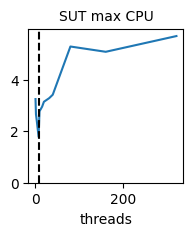

In [33]:
df = evaluation.get_monitoring_metric('total_cpu_util', component='loading').max()
df.index = df.index.map(lambda x: int(x.replace("PostgreSQL-AWS-", "").replace("-1", "")))
ax = df.plot(figsize=(2,2), title="SUT max CPU")
ax.set_xlabel("threads")
ax.title.set_size(10)
ax.axvline(8, color='k', linestyle='--')
ax.set_ylim(0, max(df)*1.05)

df

In [34]:
df = evaluation.get_monitoring_metric('total_cpu_util_s', component='loader').max() - evaluation.get_monitoring_metric('total_cpu_util_s', component='loader').min()

df.plot.bar()
df

PostgreSQL-AWS-1-1      4492.453409
PostgreSQL-AWS-2-1      4466.918420
PostgreSQL-AWS-4-1      4469.594914
PostgreSQL-AWS-8-1      4468.694049
PostgreSQL-AWS-10-1     4492.014228
PostgreSQL-AWS-16-1     4553.884366
PostgreSQL-AWS-20-1     4888.610121
PostgreSQL-AWS-32-1     6596.474625
PostgreSQL-AWS-40-1     7430.785612
PostgreSQL-AWS-80-1     7856.448013
PostgreSQL-AWS-160-1    8060.726411
PostgreSQL-AWS-320-1    7496.463006
dtype: float64

1       0.994355
2       1.987853
4       3.976104
8       7.947201
10      9.918389
16     11.275526
20     14.550403
32     27.816863
40     28.246362
80     34.840499
160    27.439642
320    35.662347
dtype: float64

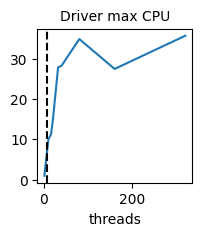

In [35]:
df = evaluation.get_monitoring_metric('total_cpu_util', component='loader').max()
df.index = df.index.map(lambda x: int(x.replace("PostgreSQL-AWS-", "").replace("-1", "")))
ax = df.plot(figsize=(2,2), title="Driver max CPU")
ax.set_xlabel("threads")
ax.title.set_size(10)
ax.axvline(8, color='k', linestyle='--')

df

1      0.793571
2      1.521491
4      2.950352
8      4.880153
10     5.103935
16     5.065846
20     5.424815
32     7.282645
40     7.895676
80     8.449886
160    8.865073
320    8.039952
dtype: float64

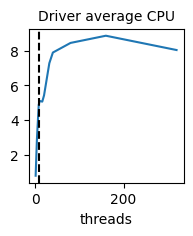

In [36]:
df = evaluation.get_monitoring_metric('total_cpu_util', component='loader').mean()
df.index = df.index.map(lambda x: int(x.replace("PostgreSQL-AWS-", "").replace("-1", "")))
ax = df.plot(figsize=(2,2), title="Driver average CPU")
ax.set_xlabel("threads")
ax.title.set_size(10)
ax.axvline(8, color='k', linestyle='--')

df

1       99.345473
2       99.420599
4       99.437558
8       99.387785
10      99.392578
16      99.359716
20      94.047597
32      90.622612
40      99.332657
80      99.472583
160     99.367677
320    101.684266
dtype: float64

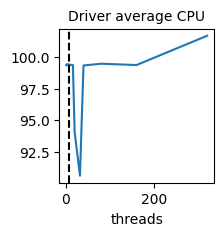

In [37]:
df = evaluation.get_monitoring_metric('total_cpu_util_max', component='loader').max()*100
df.index = df.index.map(lambda x: int(x.replace("PostgreSQL-AWS-", "").replace("-1", "")))
ax = df.plot(figsize=(2,2), title="Driver average CPU")
ax.set_xlabel("threads")
ax.title.set_size(10)
ax.axvline(8, color='k', linestyle='--')

df

PostgreSQL-AWS-1-1        25.605469
PostgreSQL-AWS-2-1        39.972656
PostgreSQL-AWS-4-1        53.382812
PostgreSQL-AWS-8-1        86.554688
PostgreSQL-AWS-10-1      103.761719
PostgreSQL-AWS-16-1      152.832031
PostgreSQL-AWS-20-1      184.187500
PostgreSQL-AWS-32-1      282.390625
PostgreSQL-AWS-40-1      347.457031
PostgreSQL-AWS-80-1      658.632812
PostgreSQL-AWS-160-1    1219.386719
PostgreSQL-AWS-320-1    2237.378906
dtype: float64

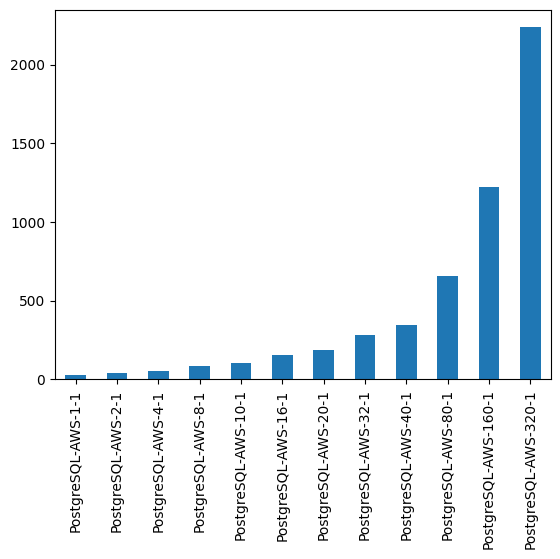

In [38]:
df = evaluation.get_monitoring_metric('total_cpu_memory', component='loader').max()

df.plot.bar()

df

PostgreSQL-AWS-1-1        26.625000
PostgreSQL-AWS-2-1        40.597656
PostgreSQL-AWS-4-1        54.078125
PostgreSQL-AWS-8-1        87.328125
PostgreSQL-AWS-10-1      104.664062
PostgreSQL-AWS-16-1      153.476562
PostgreSQL-AWS-20-1      185.476562
PostgreSQL-AWS-32-1      283.421875
PostgreSQL-AWS-40-1      348.488281
PostgreSQL-AWS-80-1      659.109375
PostgreSQL-AWS-160-1    1219.386719
PostgreSQL-AWS-320-1    2237.765625
dtype: float64

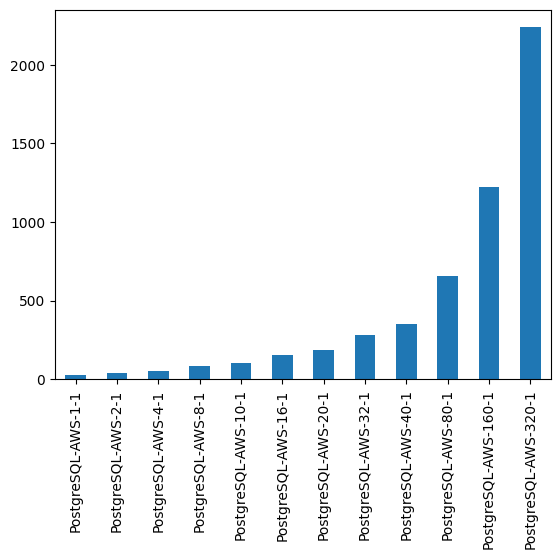

In [39]:
df = evaluation.get_monitoring_metric('total_cpu_memory_cached', component='loader').max()

df.plot.bar()

df

1      133.041474
2      192.171954
4      197.001085
8      196.577808
10     195.812700
16     195.028927
20     196.802685
32     198.060238
40     197.427172
80     197.494833
160    199.299914
320    136.908602
dtype: float64

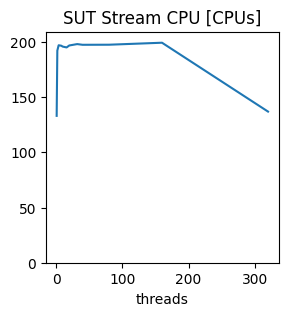

In [40]:
df = evaluation.get_monitoring_metric('total_cpu_util_s', component='stream').max() - evaluation.get_monitoring_metric('total_cpu_util_s', component='stream').min()

df.index = df.index.map(lambda x: int(x.replace("PostgreSQL-AWS-", "").replace("-1", "")))
ax = df.plot(figsize=(3,3), title="SUT Stream CPU [CPUs]")
ax.set_xlabel("threads")
ax.set_ylim(0, max(df)*1.05)

df

<AxesSubplot: >

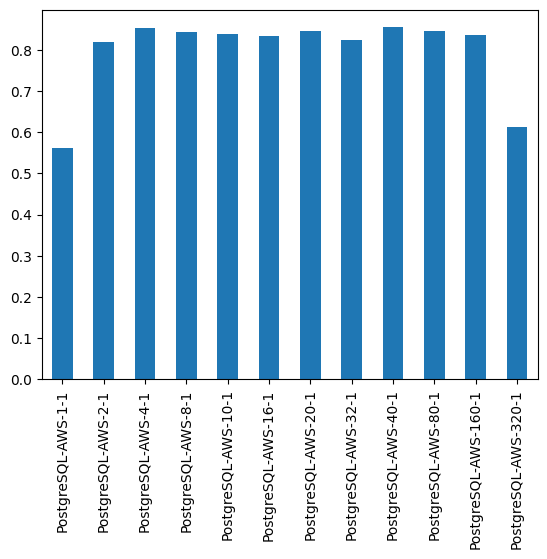

In [41]:
df = evaluation.get_monitoring_metric('total_cpu_util', component='stream').max()

df.plot.bar()

PostgreSQL-AWS-1-1      27951.511719
PostgreSQL-AWS-2-1      28020.914062
PostgreSQL-AWS-4-1      28144.710938
PostgreSQL-AWS-8-1      28151.570312
PostgreSQL-AWS-10-1     28136.730469
PostgreSQL-AWS-16-1     28122.808594
PostgreSQL-AWS-20-1     28111.222656
PostgreSQL-AWS-32-1     28147.636719
PostgreSQL-AWS-40-1     28144.222656
PostgreSQL-AWS-80-1     28043.355469
PostgreSQL-AWS-160-1    28006.570312
PostgreSQL-AWS-320-1    27899.539062
dtype: float64

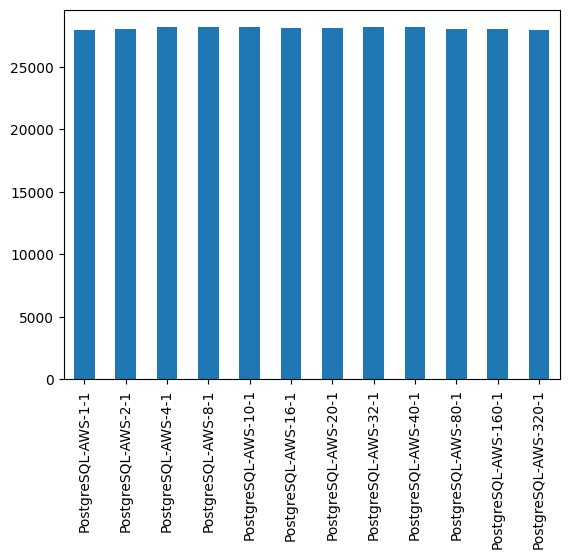

In [42]:
df = evaluation.get_monitoring_metric('total_cpu_memory', component='stream').max()
df.plot.bar()

df

PostgreSQL-AWS-1-1      59350.882812
PostgreSQL-AWS-2-1      59319.867188
PostgreSQL-AWS-4-1      59561.742188
PostgreSQL-AWS-8-1      59568.343750
PostgreSQL-AWS-10-1     59541.386719
PostgreSQL-AWS-16-1     59522.308594
PostgreSQL-AWS-20-1     59526.964844
PostgreSQL-AWS-32-1     59581.554688
PostgreSQL-AWS-40-1     59566.281250
PostgreSQL-AWS-80-1     59380.851562
PostgreSQL-AWS-160-1    59346.386719
PostgreSQL-AWS-320-1    58333.843750
dtype: float64

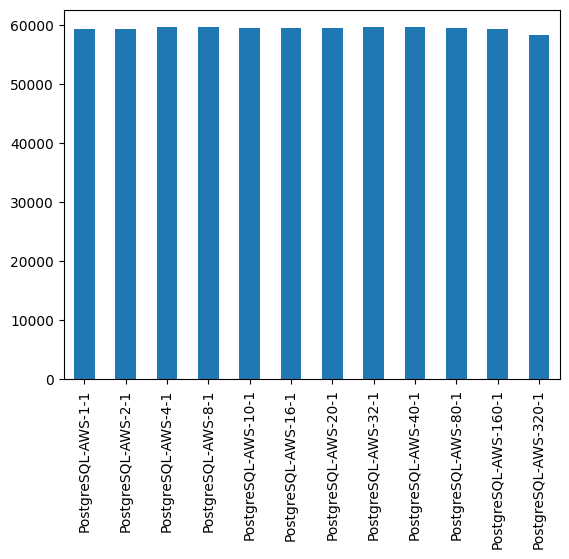

In [43]:
df = evaluation.get_monitoring_metric('total_cpu_memory_cached', component='stream').max()
df.plot.bar()

df

<AxesSubplot: >

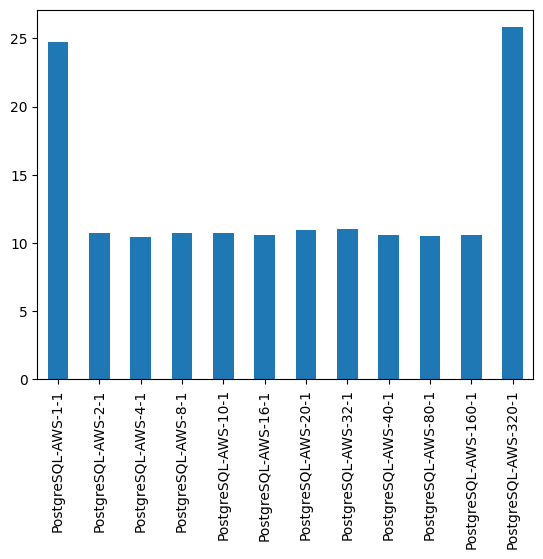

In [44]:
df = evaluation.get_monitoring_metric('total_cpu_util_s', component='benchmarker').max() - evaluation.get_monitoring_metric('total_cpu_util_s', component='benchmarker').min()

df.plot.bar()

<AxesSubplot: >

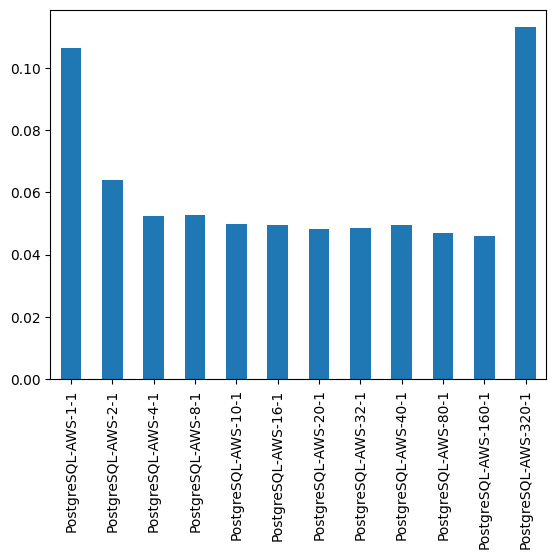

In [45]:
df = evaluation.get_monitoring_metric('total_cpu_util', component='benchmarker').max()

df.plot.bar()

<AxesSubplot: >

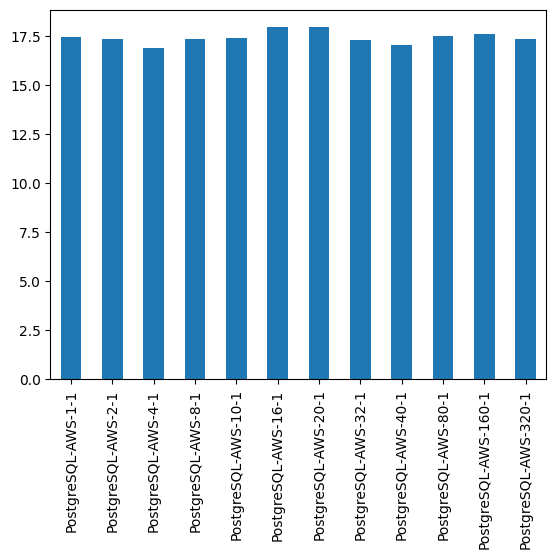

In [46]:
df = evaluation.get_monitoring_metric('total_cpu_memory', component='benchmarker').max()

df.plot.bar()

<AxesSubplot: >

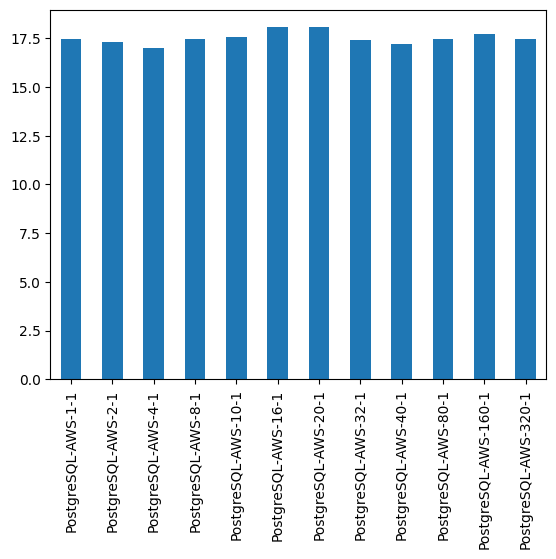

In [47]:
df = evaluation.get_monitoring_metric('total_cpu_memory_cached', component='benchmarker').max()

df.plot.bar()

## Network Gb/s

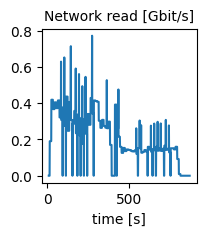

In [48]:
df = evaluation.get_monitoring_metric('total_network_rx', component='loading').diff(periods=10)/10*8/1000

#df['PostgreSQL-AWS-320-1'].
ax = df['PostgreSQL-AWS-10-1'].plot(figsize=(2,2), title="Network read [Gbit/s]", legend=False)
ax.set_xlabel("time [s]")
ax.title.set_size(10)


## Max Util per CPU [%]

In [49]:
df = evaluation.get_monitoring_metric('total_cpu_util_max', component='loading')*100

#df['PostgreSQL-AWS-16-1'].
ax = df['PostgreSQL-AWS-10-1'].plot(figsize=(2,2), title="SUT core max [%]", legend=False)
ax.set_xlabel("time [s]")
ax.title.set_size(10)


## Disk write [Mb/s]

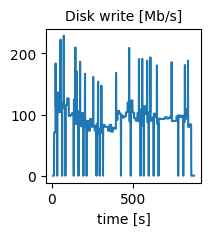

In [50]:
df = evaluation.get_monitoring_metric('total_fs_write', component='loading').diff(periods=10)/10

ax = df['PostgreSQL-AWS-10-1'].plot(figsize=(2,2), title="Disk write [Mb/s]", legend=False)
ax.set_xlabel("time [s]")
ax.title.set_size(10)


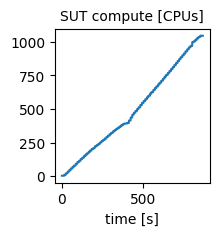

In [51]:
df = evaluation.get_monitoring_metric('total_cpu_util_s', component='loading')

#df['PostgreSQL-AWS-16-1'].
ax = df['PostgreSQL-AWS-10-1'].plot(figsize=(2,2), title="SUT compute [CPUs]", legend=False)
ax.set_xlabel("time [s]")
ax.title.set_size(10)
